In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.columns=df.columns.str.lower()
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df=df.drop(columns="rownumber")
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df["exited"]=df["exited"].map({0:"No",1:"Yes"})
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       10000 non-null  int64  
 1   surname          10000 non-null  object 
 2   creditscore      10000 non-null  int64  
 3   geography        10000 non-null  object 
 4   gender           10000 non-null  object 
 5   age              10000 non-null  int64  
 6   tenure           10000 non-null  int64  
 7   balance          10000 non-null  float64
 8   numofproducts    10000 non-null  int64  
 9   hascrcard        10000 non-null  int64  
 10  isactivemember   10000 non-null  int64  
 11  estimatedsalary  10000 non-null  float64
 12  exited           10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


In [7]:
df.describe()

,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [8]:
df.isnull().sum()

customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [9]:
df.groupby("exited").agg(customers=("customerid","nunique"),avg_credit=("creditscore","mean"),
                        avg_age=("age","mean"),
                        avg_life=("tenure","mean"),
                        avg_bal=("balance","mean"),
                        tot_bal=("balance","sum"),
                        card_holders=("hascrcard","sum"),
                        active=("isactivemember","sum"))

,customers,avg_credit,avg_age,avg_life,avg_bal,tot_bal,card_holders,active
exited,,,,,,,,
No,7963,651.853196,37.408389,5.033279,72745.296779,5.792708e+08,5631,4416
Yes,2037,645.351497,44.837997,4.932744,91108.539337,1.855881e+08,1424,735


In [10]:
df["geography"].value_counts()

geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
geo=df.groupby(["geography","exited"])["customerid"].count().reset_index()
geo["Total_cust"]=geo.groupby("geography")["customerid"].transform("sum")
geo["perc"]=round(geo["customerid"]*100/geo["Total_cust"],2)
geo

,geography,exited,customerid,Total_cust,perc
0,France,No,4204,5014,83.85
1,France,Yes,810,5014,16.15
2,Germany,No,1695,2509,67.56
3,Germany,Yes,814,2509,32.44
4,Spain,No,2064,2477,83.33
5,Spain,Yes,413,2477,16.67


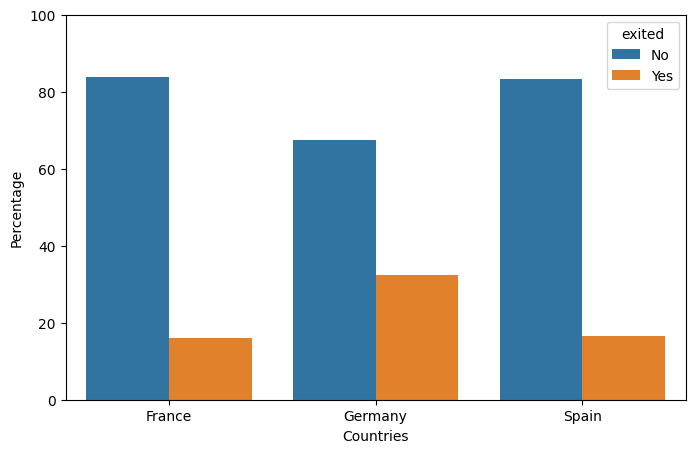

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data=geo,x="geography",y="perc",hue="exited")
plt.xlabel("Countries")
plt.ylabel("Percentage")
plt.ylim(0,100)
plt.show()

The graph shows exited customer percentage for each country.  
germany shows highest percentage of people who left.

In [13]:
gender=df.groupby(["gender","exited"])["customerid"].count().reset_index()
gender["Total_cust"]=gender.groupby("gender")["customerid"].transform("sum")
gender["perc"]=round(gender["customerid"]*100/gender["Total_cust"],2)
gender

,gender,exited,customerid,Total_cust,perc
0,Female,No,3404,4543,74.93
1,Female,Yes,1139,4543,25.07
2,Male,No,4559,5457,83.54
3,Male,Yes,898,5457,16.46


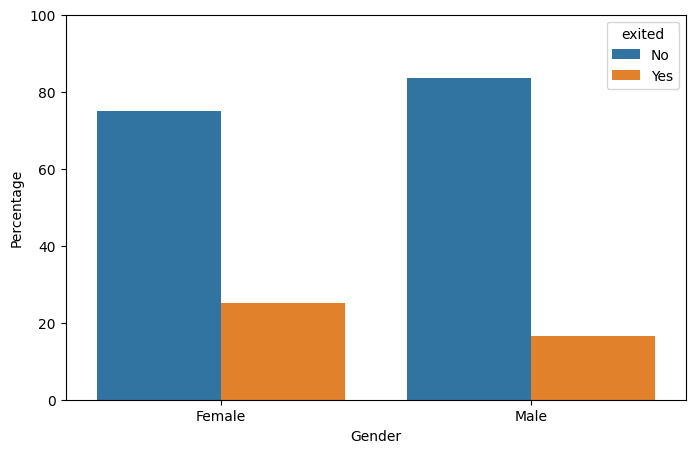

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(data=gender,x="gender",y="perc",hue="exited")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.ylim(0,100)
plt.show()

The graph shows exited customer percentage as per gender.
women show slightly higher percent 

In [15]:
member=df.groupby("exited").agg(ismember=("isactivemember","sum"),
                         customers=("customerid","nunique")).reset_index()

member["perc"]=member["ismember"]*100/member["customers"]
member

,exited,ismember,customers,perc
0,No,4416,7963,55.456486
1,Yes,735,2037,36.082474


55 percent of people who haven't exited are members, while people who exited have have only 36 percent members.  
which shows members are more loyal than an average customer

In [16]:
df["balance:salary"]=round(df["balance"]/df["estimatedsalary"],2)
df["balance:salary"].describe()

count    10000.000000
mean         3.878711
std        108.337297
min          0.000000
25%          0.000000
50%          0.750000
75%          1.510000
max      10614.660000
Name: balance:salary, dtype: float64

In [17]:
df["balance:salary"]=df["balance:salary"].clip(upper=50)

In [18]:
df.groupby("exited")["balance:salary"].mean()

exited
No     1.885902
Yes    2.397722
Name: balance:salary, dtype: float64

Customers with much higher balance-to-salary ratios are far more likely to exit.

(0.0, 60.0)

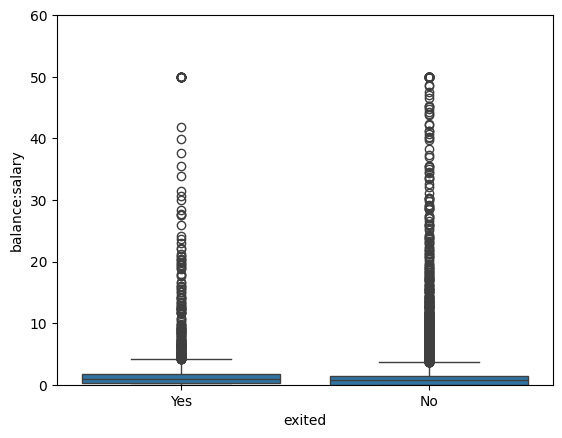

In [19]:
sns.boxplot(data=df,x="exited",y="balance:salary")
plt.ylim(0,60)

In [20]:
df["agegroup"]=pd.cut(df["age"],bins=[18,30,40,50,60,100],labels=["young","early_mid","mid","early_senior","senior"])
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,balance:salary,agegroup
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes,0.00,mid
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No,0.74,mid
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes,1.40,mid
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,No,0.00,early_mid
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No,1.59,mid


In [21]:
age=df.groupby(["agegroup","exited"])["customerid"].nunique().reset_index()

age["perc"]=round(age["customerid"]*100/age.groupby("agegroup")["customerid"].transform("sum"),2)
age

C:\Users\Mayank\AppData\Local\Temp\ipykernel_41352\1975548944.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age=df.groupby(["agegroup","exited"])["customerid"].nunique().reset_index()
C:\Users\Mayank\AppData\Local\Temp\ipykernel_41352\1975548944.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age["perc"]=round(age["customerid"]*100/age.groupby("agegroup")["customerid"].transform("sum"),2)


,agegroup,exited,customerid,perc
0,young,No,1800,92.50
1,young,Yes,146,7.50
2,early_mid,No,3913,87.91
3,early_mid,Yes,538,12.09
4,mid,No,1532,66.03
5,mid,Yes,788,33.97
6,early_senior,No,349,43.79
7,early_senior,Yes,448,56.21
8,senior,No,349,75.22
9,senior,Yes,115,24.78


early seniors have the highest rate of exiting , this could be because of reasons like  
moving retirement funds, closing unnecessary accounts, relocating etc

In [22]:
df.groupby(["agegroup", "exited"])["balance:salary"].mean()

C:\Users\Mayank\AppData\Local\Temp\ipykernel_41352\1884645395.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["agegroup", "exited"])["balance:salary"].mean()


agegroup      exited
young         No        1.939667
              Yes       2.455548
early_mid     No        1.832533
              Yes       2.268848
mid           No        1.996775
              Yes       2.407779
early_senior  No        2.106132
              Yes       2.584152
senior        No        1.455931
              Yes       2.173739
Name: balance:salary, dtype: float64

Across all age groups, customers who exited the bank have a higher balance-to-salary ratio compared to those who stayed.

This pattern is consistent and suggests that customers holding relatively large balances compared to their income are more likely to churn.

In [23]:
df["productcategory"]=pd.cut(df["numofproducts"],bins=[0,1,2,10],labels=["low","medium","high"])

prod=df.groupby(["productcategory","exited"])["customerid"].nunique().reset_index()

prod["total"]=prod.groupby("productcategory")["customerid"].transform("sum")
prod["perc"]=prod["customerid"]*100/prod["total"]

prod

C:\Users\Mayank\AppData\Local\Temp\ipykernel_41352\153129332.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prod=df.groupby(["productcategory","exited"])["customerid"].nunique().reset_index()
C:\Users\Mayank\AppData\Local\Temp\ipykernel_41352\153129332.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prod["total"]=prod.groupby("productcategory")["customerid"].transform("sum")


,productcategory,exited,customerid,total,perc
0,low,No,3675,5084,72.285602
1,low,Yes,1409,5084,27.714398
2,medium,No,4242,4590,92.418301
3,medium,Yes,348,4590,7.581699
4,high,No,46,326,14.110429
5,high,Yes,280,326,85.889571


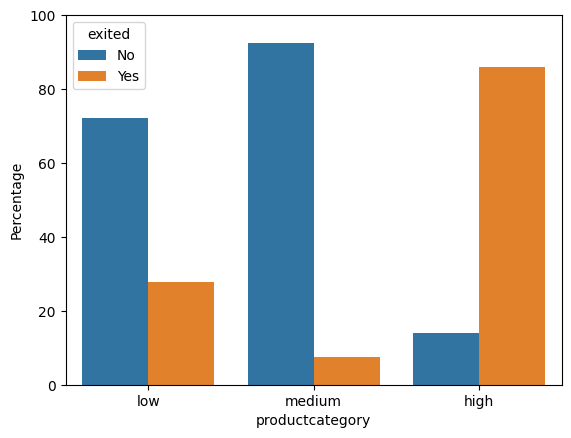

In [24]:
sns.barplot(data=prod,x="productcategory",y="perc",hue="exited")
plt.ylabel("Percentage")
plt.ylim(0,100)
plt.show()


People with higher products tend to leave more than people with lower products

In [25]:
df["risk"]=((df["age"]>50) & (df["isactivemember"]==0)).astype(int)

risk=df.groupby(["risk","exited"])["customerid"].nunique().reset_index()
risk["total"]=risk.groupby("risk")["customerid"].transform("sum")
risk["perc"]=risk["customerid"]*100/risk["total"]
risk

,risk,exited,customerid,total,perc
0,0,No,7899,9575,82.496084
1,0,Yes,1676,9575,17.503916
2,1,No,64,425,15.058824
3,1,Yes,361,425,84.941176


Customers aged above 50 who are inactive members show an extremely high churn rate (~85%). Only around 15% of this segment remain with the bank.

This suggests a strong interaction between age and activity status. Older customers who are not actively engaged appear significantly more likely to exit.

In [26]:
#Financial Impact

churn_bal=df[df["exited"]=="Yes"]["balance"].sum()
total_bal=df["balance"].sum()

churn_bal*100/total_bal

np.float64(24.26435730271586)

## 🔎 Key Insights from Customer Churn Analysis

### 1️⃣ Age is a Strong Churn Driver
- Early Senior customers show the highest churn percentage.
- Younger customers are more likely to stay.
- Retention strategies should focus on older age groups.

### 2️⃣ Inactive Members Are High Risk
- Non-active customers churn significantly more than active members.
- Increasing engagement can directly reduce churn risk.

### 3️⃣ Multi-Product Customers Churn More
- Customers with a higher number of products show higher churn rates.
- This may indicate dissatisfaction, pricing concerns, or better competitor offers.

### 4️⃣ Geography Influences Churn
- Germany shows noticeably higher churn percentages.
- Region-specific strategies may be required.

### 5️⃣ Gender Shows Minor Variation
- Slight difference in churn between genders.
- Not a primary churn driver but worth monitoring.

### 6️⃣ Overall Churn Rate
- Approximately 20% of customers have exited.
- Churn is significant and requires proactive retention efforts.